In [162]:
import pandas as pd
from sklearn import preprocessing 
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler,RobustScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt


In [163]:
df = pd.read_csv('titanic_train.csv')
df

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,C39,S,NaN,NaN,London / Birmingham,0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C,NaN,258.0,"Buffalo, NY",0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S,12,NaN,"Moscow / Bronx, NY",1
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,NaN,NaN,NaN,0


In [164]:
le = preprocessing.LabelEncoder()
le.fit(df["sex"])
print(list(le.classes_))
print(le.transform(df["sex"]))

['female', 'male']
[0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0
 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0
 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1
 1 0 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0
 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0
 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1
 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0
 0 1 0

In [165]:
df1 = pd.DataFrame(le.transform(df["sex"]))
df['gender'] = df1
df
# Observe the result


,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,gender
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1,0
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0,1
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1,0
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,C39,S,NaN,NaN,London / Birmingham,0,1
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C,NaN,258.0,"Buffalo, NY",0,1
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S,12,NaN,"Moscow / Bronx, NY",1,0
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,NaN,NaN,NaN,0,0


In [166]:
df.isnull().sum() # missing values count in dataframe of each column

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
gender            0
dtype: int64

In [167]:
df = df.drop(['passenger_id','sex', 'name','ticket','cabin','boat','body','home.dest'], axis=1)
df

,pclass,age,sibsp,parch,fare,embarked,survived,gender
0,3,NaN,0,0,7.7333,Q,1,0
1,3,38.0,0,0,8.6625,S,0,1
2,3,30.0,1,1,24.1500,S,0,0
3,2,54.0,1,3,23.0000,S,1,0
4,2,40.0,0,0,13.0000,S,0,1
...,...,...,...,...,...,...,...,...
845,1,55.0,0,0,50.0000,S,0,1
846,1,58.0,0,0,29.7000,C,0,1
847,2,24.0,1,0,26.0000,S,1,0
848,3,3.0,1,1,13.7750,S,0,0


In [168]:
df.isnull().sum()

pclass        0
age         174
sibsp         0
parch         0
fare          1
embarked      1
survived      0
gender        0
dtype: int64

In [169]:
df.head()

,pclass,age,sibsp,parch,fare,embarked,survived,gender
0,3,NaN,0,0,7.7333,Q,1,0
1,3,38.0,0,0,8.6625,S,0,1
2,3,30.0,1,1,24.1500,S,0,0
3,2,54.0,1,3,23.0000,S,1,0
4,2,40.0,0,0,13.0000,S,0,1


In [170]:
print(df['embarked'].unique())

['Q' 'S' 'C' nan]


In [171]:
mode_embarked = df['embarked'].mode()[0]    #filled the value using mode
df['embarked'] = df['embarked'].fillna(mode_embarked)

In [172]:
print(df['embarked'].unique())

['Q' 'S' 'C']


In [173]:
mean_fare =  df['fare'].mean()         #filled the value using mean
df['fare'] = df['fare'].fillna(mean_fare)

In [174]:
le = LabelEncoder()         # transform the embarked values to numerical values        

# fit the encoder to the categorical column
le.fit(df['embarked'])

# transform the column values to numerical values
df['embarked'] = le.transform(df['embarked'])

# print the encoded values
print(df['embarked'])

0      1
1      2
2      2
3      2
4      2
      ..
845    2
846    0
847    2
848    2
849    2
Name: embarked, Length: 850, dtype: int32


In [175]:
df

,pclass,age,sibsp,parch,fare,embarked,survived,gender
0,3,NaN,0,0,7.7333,1,1,0
1,3,38.0,0,0,8.6625,2,0,1
2,3,30.0,1,1,24.1500,2,0,0
3,2,54.0,1,3,23.0000,2,1,0
4,2,40.0,0,0,13.0000,2,0,1
...,...,...,...,...,...,...,...,...
845,1,55.0,0,0,50.0000,2,0,1
846,1,58.0,0,0,29.7000,0,0,1
847,2,24.0,1,0,26.0000,2,1,0
848,3,3.0,1,1,13.7750,2,0,0


In [176]:
df.isnull().mean()

pclass      0.000000
age         0.204706
sibsp       0.000000
parch       0.000000
fare        0.000000
embarked    0.000000
survived    0.000000
gender      0.000000
dtype: float64

In [177]:
df['age'] = df['age'].apply(lambda x: np.random.choice(df['age'].dropna()) if pd.isnull(x) else x) 
# here we will use Random Sample Imputation on age column to handle its missing values
df

,pclass,age,sibsp,parch,fare,embarked,survived,gender
0,3,58.0,0,0,7.7333,1,1,0
1,3,38.0,0,0,8.6625,2,0,1
2,3,30.0,1,1,24.1500,2,0,0
3,2,54.0,1,3,23.0000,2,1,0
4,2,40.0,0,0,13.0000,2,0,1
...,...,...,...,...,...,...,...,...
845,1,55.0,0,0,50.0000,2,0,1
846,1,58.0,0,0,29.7000,0,0,1
847,2,24.0,1,0,26.0000,2,1,0
848,3,3.0,1,1,13.7750,2,0,0


In [178]:

def plot_box(data):                             # we use box plot to check outliers in data set
    # Create a box plot of the data
    fig, ax = plt.subplots()
    ax.boxplot(data)

    # Set the plot title and axis labels
    ax.set_title('Box plot of data')
    ax.set_xlabel('Data')
    ax.set_ylabel('Values')

    plt.show()

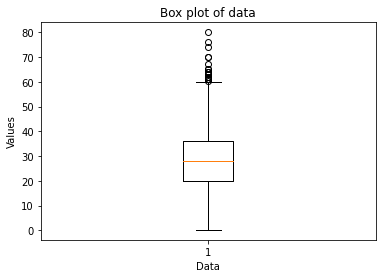

In [179]:
plot_box(df['age']) # As we will see that there will be outlier in age

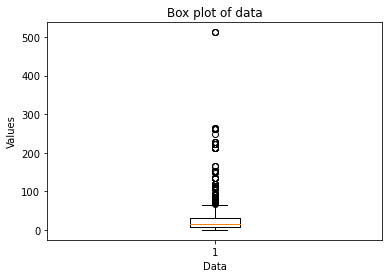

In [180]:
plot_box(df['fare']) # Outlier is clearly shown this diagram

In [181]:
# Note we will moslt only check outliers in weighted algorithams

In [182]:
scaler = StandardScaler()        ## Scale numerical features
# scaler = RobustScaler() 
df[['age', 'fare']] = scaler.fit_transform(df[['age', 'fare']])
df


,pclass,age,sibsp,parch,fare,embarked,survived,gender
0,3,1.8750,0,0,-0.275924,1,1,0
1,3,0.6250,0,0,-0.235706,2,0,1
2,3,0.1250,1,1,0.434627,2,0,0
3,2,1.6250,1,3,0.384852,2,1,0
4,2,0.7500,0,0,-0.047970,2,0,1
...,...,...,...,...,...,...,...,...
845,1,1.6875,0,0,1.553471,2,0,1
846,1,1.8750,0,0,0.674843,0,0,1
847,2,-0.2500,1,0,0.514699,2,1,0
848,3,-1.5625,1,1,-0.014426,2,0,0


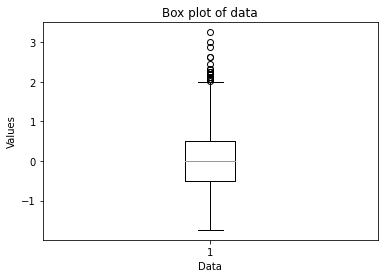

In [183]:
plot_box(df['age'])

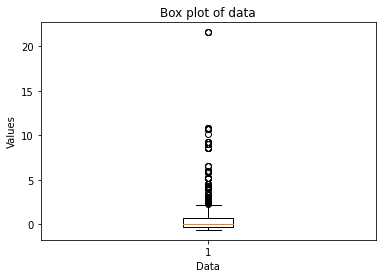

In [184]:
plot_box(df['fare'])

In [109]:
X = df.drop(['survived'], axis=1)
y = df['survived']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500)
clf.fit(X_train, y_train)

MLPClassifier(max_iter=500)

In [116]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7647058823529411
Precision: 0.71875
Recall: 0.6764705882352942
F1-score: 0.696969696969697


In [135]:
clf = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', solver='adam', max_iter=400)
clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50,), max_iter=400)

In [136]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7705882352941177
Precision: 0.7301587301587301
Recall: 0.6764705882352942
F1-score: 0.7022900763358779


In [ ]:
#by reducing the hidden layers we will get good scores